In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools

In [7]:
base = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/base_again/SalishSea_1h_20230301_20230301_grid_T.nc')
tands5 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/tands_5day/SalishSea_1h_20230301_20230305_grid_T.nc')

In [3]:
def plotTimeSeries(base, new, field, index1, index2, index3):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    diff = new[field]- base[field]
    sum_diff = diff.sum(dim = ["y", "x"])
    sum_diff_time1 = sum_diff.isel(deptht = index1)
    sum_diff_time1.plot(ax=axs[0],x = "time_counter", color = 'blue')
    axs[0].set_title(f'Sum of difference in {field} at depth {index1} m')
    axs[0].set_ylabel(f'Temperature')

    sum_diff_time2 = sum_diff.isel(deptht = index2)
    sum_diff_time2.plot(ax=axs[1],x = "time_counter", color = 'blue')
    axs[1].set_title(f'Sum of difference in {field} at depth {index2} m')
    axs[1].set_ylabel(f'Temperature')

    sum_diff_time3 = sum_diff.isel(deptht = index3)
    sum_diff_time3.plot(ax=axs[2],x = "time_counter", color = 'blue')
    axs[2].set_title(f'Sum of difference in {field} at depth {index3} m')
    axs[2].set_ylabel(f'Temperature')

    plt.show()


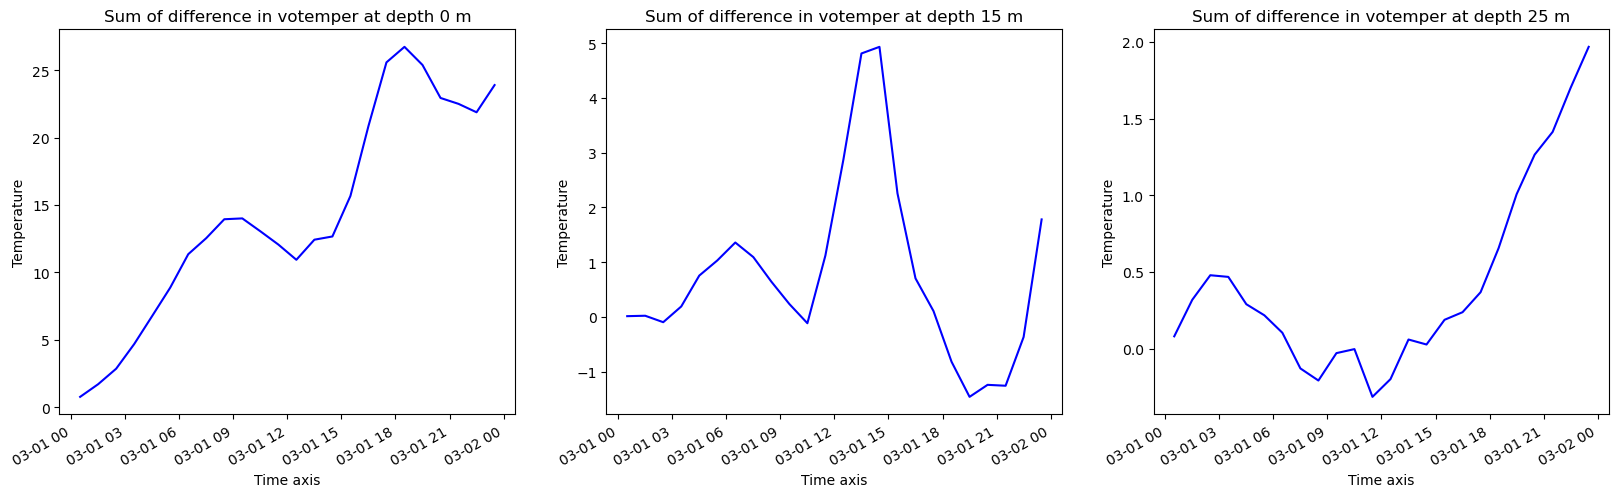

In [4]:
plotTimeSeries(base, tands5, 'votemper', 0, 15, 25)

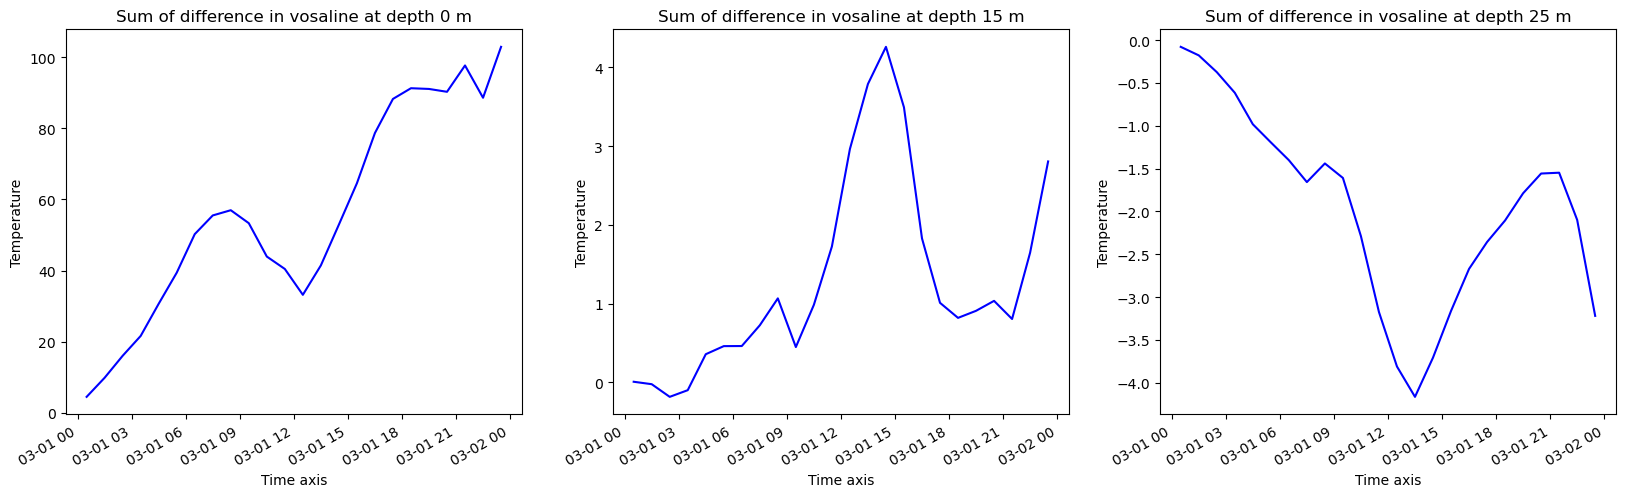

In [5]:
plotTimeSeries(base, tands5, 'vosaline', 0, 15, 25)

In [8]:
import pandas as pd
data = pd.read_csv('/home/sallen/MEOPAR/Metro_Data/UBC Output.xlsx-2023-7-31 15.19.6.csv', 
                       low_memory=False, parse_dates=[11])
data.keys()

Index(['LIMS Product', 'Lab Name', 'LIMS Project', 'Project Name', 'Job ID',
       'Lab ID', 'Sample Name', 'Sampling Point', 'Sampling Point Description',
       'Matrix', 'Sample Type', 'Sampled Date', 'Received Date',
       'Extraction Date', 'Analysis Date', 'Report Date', 'Test Type',
       'Method', 'Order Number', 'New Analysis', 'Class', 'Subclass',
       'Analyte', 'LIMS Analysis Code', 'Result', 'DL', 'Units', 'Qualifier',
       'Qualifier Description', 'Sampled By'],
      dtype='object')

In [11]:
data_time = data.set_index('Sampled Date')
data_time['LIMS Analysis Code'].unique()


array(['PH', 'TEMP', 'BOD_CALC', 'COD', 'SS', 'COND', 'VSS', 'NH3', 'CL',
       'HARDNESS', 'SO4', 'TKN', 'AL_DISSOLVED', 'BA_DISSOLVED',
       'B_DISSOLVED', 'CD_DISSOLVED', 'CR_DISSOLVED', 'CO_DISSOLVED',
       'CU_DISSOLVED', 'FE_DISSOLVED', 'PB_DISSOLVED', 'MN_DISSOLVED',
       'MO_DISSOLVED', 'NI_DISSOLVED', 'P_DISSOLVED', 'AG_DISSOLVED',
       'SN_DISSOLVED', 'ZN_DISSOLVED', 'AL_TOTAL', 'AS_TOTAL', 'BA_TOTAL',
       'B_TOTAL', 'CD_TOTAL', 'CA_TOTAL', 'CR_TOTAL', 'CO_TOTAL',
       'CU_TOTAL', 'FE_TOTAL', 'PB_TOTAL', 'MG_TOTAL', 'MN_TOTAL',
       'HG_TOTAL', 'MO_TOTAL', 'NI_TOTAL', 'P_TOTAL', 'SE_TOTAL',
       'AG_TOTAL', 'SN_TOTAL', 'ZN_TOTAL', 'DO', 'NO3', 'NO2', 'CN_TOTAL',
       'ALKALINITY', 'CA_DISSOLVED', 'MG_DISSOLVED', 'K_DISSOLVED',
       'NA_DISSOLVED', 'K_TOTAL', 'NA_TOTAL', 'DOC', 'TOC', 'TEMP_INSITU',
       'PH_INSITU', 'DO_INSITU', 'AS_DISSOLVED', 'SE_DISSOLVED', 'F',
       'PH_15_DEGREES', 'UN-IONIZED_NH3', 'SB_TOTAL', 'BE_TOTAL',
       'BI_TOTAL', 'LI

In [4]:
def plotTimeSeriesForAnalysisCode(field):
    data = data_time.loc[data_time['LIMS Analysis Code']== field]
    data['Result'] = pd.to_numeric(data.Result)
    data['Result'].plot()

/tmp/ipykernel_2115925/1551056515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Result'] = pd.to_numeric(data.Result)


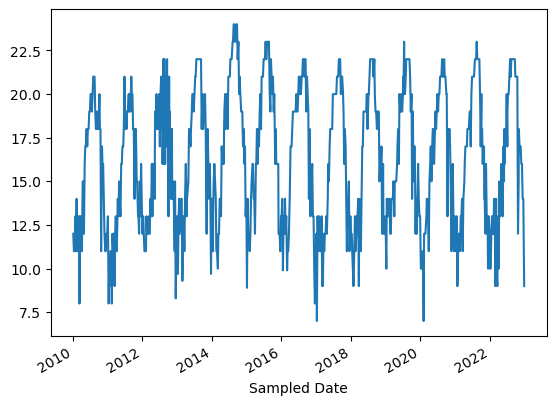

In [25]:
plotTimeSeriesForAnalysisCode('TEMP')

/tmp/ipykernel_2115925/1551056515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Result'] = pd.to_numeric(data.Result)


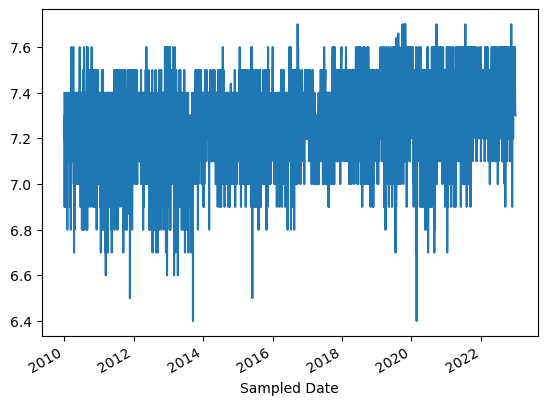

In [28]:
plotTimeSeriesForAnalysisCode('PH')

In [7]:
plotTimeSeriesForAnalysisCode('NH3')

ValueError: Unable to parse string "<0.2" at position 2943

/tmp/ipykernel_2586248/1551056515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Result'] = pd.to_numeric(data.Result)


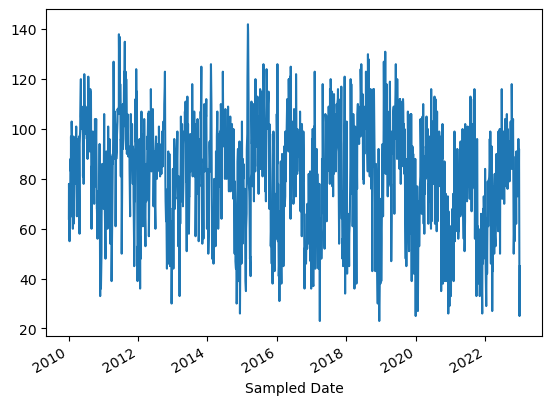

In [8]:
plotTimeSeriesForAnalysisCode('BOD_CALC')

/tmp/ipykernel_2586248/1551056515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Result'] = pd.to_numeric(data.Result)


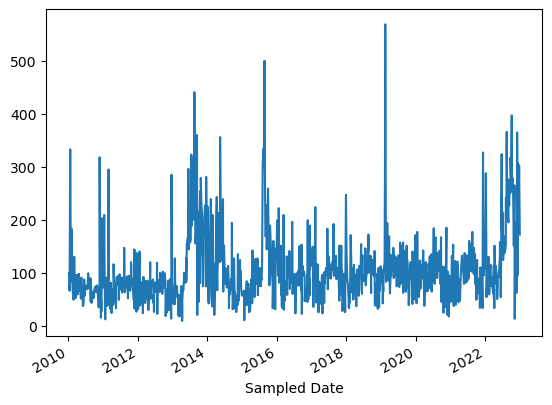

In [9]:
plotTimeSeriesForAnalysisCode('CL')

In [10]:
data_time['Analyte'].unique()

array(['pH', 'Temperature', 'Biochemical Oxygen Demand - Calculated',
       'Chemical Oxygen Demand', 'Total Suspended Solids', 'Conductivity',
       'Volatile Suspended Solids', 'Nitrogen - Ammonia as N', 'Chloride',
       'Hardness as CaCO3', 'Sulphate', 'Nitrogen - Total Kjeldahl',
       'Aluminum Dissolved', 'Barium Dissolved', 'Boron Dissolved',
       'Cadmium Dissolved', 'Chromium Dissolved', 'Cobalt Dissolved',
       'Copper Dissolved', 'Iron Dissolved', 'Lead Dissolved',
       'Manganese Dissolved', 'Molybdenum Dissolved', 'Nickel Dissolved',
       'Phosphorus Dissolved', 'Silver Dissolved', 'Tin Dissolved',
       'Zinc Dissolved', 'Aluminum Total', 'Arsenic Total',
       'Barium Total', 'Boron Total', 'Cadmium Total', 'Calcium Total',
       'Chromium Total', 'Cobalt Total', 'Copper Total', 'Iron Total',
       'Lead Total', 'Magnesium Total', 'Manganese Total',
       'Mercury Total', 'Molybdenum Total', 'Nickel Total',
       'Phosphorus Total', 'Selenium Total', '